## Data of a Business

In [116]:
import pandas as pd
import numpy as np

file_path = "../../data/raw/yp_competitors_rws_0051_2506.csv"
df2 = pd.read_csv(file_path) 
df2['status'] = df2.ratingValue.apply(lambda x: 1 if x > 3 else 0)
df2.rename(columns={'description':'reviews'}, inplace=True)
df2.head()

,alias,ratingValue,dataPublished,reviews,author,status
0,underwater-discoveries-lahaina,5,2013-07-23,Sitting on the beach is one way to experience ...,Dawn B.,1
1,underwater-discoveries-lahaina,5,2011-07-01,I spent a lot of time on Yelp and Tripadvisor ...,Nora M.,1
2,underwater-discoveries-lahaina,5,2011-06-05,Went on my first snorkeling trip with these gu...,Beryl C.,1
3,underwater-discoveries-lahaina,5,2011-03-01,We are visiting Maui for two weeks - had made ...,Donna K.,1
4,underwater-discoveries-lahaina,5,2009-12-03,If you want to go on a snorkel trip and don't ...,nicky f.,1


In [92]:
import pandas as pd
import numpy as np

file_path = "../../data/processed/yp_kimos-maui-lahaina_rws.csv"
file_path = "../../data/processed/yp_kimos-maui-lahaina_rws_preprocessed.csv"
# file_path = "../../data/raw/yp_competitors_rws.csv"
df = pd.read_csv(file_path) 
df.head()

,status,reviews,sent_tokens,word_tokens,pos_tag,norm_tokens
0,1,Kimo's never disappoints. We come here once o...,"[""Kimo's never disappoints."", 'We come here on...","['Kimo', 'never', 'disappoints', 'We', 'come',...","[('Kimo', 'NNP'), ('never', 'RB'), ('disappoin...","['kimo', 'never', 'disappoint', 'come', 'everi..."
1,0,I was there the first week of October and Firs...,['I was there the first week of October and Fi...,"['I', 'was', 'there', 'the', 'first', 'week', ...","[('I', 'PRP'), ('was', 'VBD'), ('there', 'RB')...","['first', 'week', 'octob', 'first', 'think', '..."
2,1,"This place was on my ""Must Do Maui"" list and i...","['This place was on my ""Must Do Maui"" list and...","['This', 'place', 'was', 'on', 'my', 'Must', '...","[('This', 'DT'), ('place', 'NN'), ('was', 'VBD...","['place', 'must', 'maui', 'list', 'disappoint'..."
3,0,Monday night dinner here and they quickly sat ...,['Monday night dinner here and they quickly sa...,"['Monday', 'night', 'dinner', 'here', 'and', '...","[('Monday', 'NNP'), ('night', 'NN'), ('dinner'...","['monday', 'night', 'dinner', 'quickli', 'sat'..."
4,1,Nice view and amazing cocktails. They are loca...,"['Nice view and amazing cocktails.', 'They are...","['Nice', 'view', 'and', 'amazing', 'cocktails'...","[('Nice', 'NNP'), ('view', 'NN'), ('and', 'CC'...","['nice', 'view', 'amaz', 'cocktail', 'locat', ..."


In [93]:
df.groupby(by='status').count()

,reviews,sent_tokens,word_tokens,pos_tag,norm_tokens
status,,,,,
0,637,637,637,637,637
1,1856,1856,1856,1856,1856


## Data of all Businesses

In [94]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.reviews, df.status, random_state=0)

In [105]:
print('len of train : ', len(y_train))
print('len of test  : ', len(y_test))
x_train.head()

len of train :  1869
len of test  :  624


983     Well we saw the crowds outside his place and b...
711     My friends and I dined here on our last night ...
1836    First night in Maui and we decided to enjoy st...
173     What an extremely disappointing experience. Ca...
1496    Yum! Same company as Hula Grill and Dukes so y...
Name: reviews, dtype: object

In [106]:
pd.DataFrame({'test': y_test.value_counts(), 'train': y_train.value_counts()})

,test,train
1,471,1385
0,153,484


In [107]:
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

text_clf.fit(df.reviews, df.status)
predicted = text_clf.predict(df.reviews)
print(np.mean(predicted == df.status))

#predicted = text_clf.predict(x_test)
#np.mean(predicted == y_test) 
df['MultinomialNB'] = predicted

0.748896911351785


In [108]:
df.head()

,status,reviews,sent_tokens,word_tokens,pos_tag,norm_tokens,SGDClassifier,MultinomialNB,LogisticRegression
0,1,Kimo's never disappoints. We come here once o...,"[""Kimo's never disappoints."", 'We come here on...","['Kimo', 'never', 'disappoints', 'We', 'come',...","[('Kimo', 'NNP'), ('never', 'RB'), ('disappoin...","['kimo', 'never', 'disappoint', 'come', 'everi...",1,1,1
1,0,I was there the first week of October and Firs...,['I was there the first week of October and Fi...,"['I', 'was', 'there', 'the', 'first', 'week', ...","[('I', 'PRP'), ('was', 'VBD'), ('there', 'RB')...","['first', 'week', 'octob', 'first', 'think', '...",0,1,0
2,1,"This place was on my ""Must Do Maui"" list and i...","['This place was on my ""Must Do Maui"" list and...","['This', 'place', 'was', 'on', 'my', 'Must', '...","[('This', 'DT'), ('place', 'NN'), ('was', 'VBD...","['place', 'must', 'maui', 'list', 'disappoint'...",1,1,1
3,0,Monday night dinner here and they quickly sat ...,['Monday night dinner here and they quickly sa...,"['Monday', 'night', 'dinner', 'here', 'and', '...","[('Monday', 'NNP'), ('night', 'NN'), ('dinner'...","['monday', 'night', 'dinner', 'quickli', 'sat'...",1,1,1
4,1,Nice view and amazing cocktails. They are loca...,"['Nice view and amazing cocktails.', 'They are...","['Nice', 'view', 'and', 'amazing', 'cocktails'...","[('Nice', 'NNP'), ('view', 'NN'), ('and', 'CC'...","['nice', 'view', 'amaz', 'cocktail', 'locat', ...",1,1,1


In [1]:
from sklearn.linear_model import LogisticRegression

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(penalty='l2', random_state=42, solver='lbfgs',
                          max_iter=50, tol=0.05)),
])

text_clf.fit(df.reviews, df.status)
predicted = text_clf.predict(df.reviews)
print(np.mean(predicted == df.status))

#predicted = text_clf.predict(x_test)
#np.mean(predicted == y_test) 
df['LogisticRegression'] = predicted

NameError: name 'Pipeline' is not defined

In [110]:
df.head()

,status,reviews,sent_tokens,word_tokens,pos_tag,norm_tokens,SGDClassifier,MultinomialNB,LogisticRegression
0,1,Kimo's never disappoints. We come here once o...,"[""Kimo's never disappoints."", 'We come here on...","['Kimo', 'never', 'disappoints', 'We', 'come',...","[('Kimo', 'NNP'), ('never', 'RB'), ('disappoin...","['kimo', 'never', 'disappoint', 'come', 'everi...",1,1,1
1,0,I was there the first week of October and Firs...,['I was there the first week of October and Fi...,"['I', 'was', 'there', 'the', 'first', 'week', ...","[('I', 'PRP'), ('was', 'VBD'), ('there', 'RB')...","['first', 'week', 'octob', 'first', 'think', '...",0,1,0
2,1,"This place was on my ""Must Do Maui"" list and i...","['This place was on my ""Must Do Maui"" list and...","['This', 'place', 'was', 'on', 'my', 'Must', '...","[('This', 'DT'), ('place', 'NN'), ('was', 'VBD...","['place', 'must', 'maui', 'list', 'disappoint'...",1,1,1
3,0,Monday night dinner here and they quickly sat ...,['Monday night dinner here and they quickly sa...,"['Monday', 'night', 'dinner', 'here', 'and', '...","[('Monday', 'NNP'), ('night', 'NN'), ('dinner'...","['monday', 'night', 'dinner', 'quickli', 'sat'...",1,1,1
4,1,Nice view and amazing cocktails. They are loca...,"['Nice view and amazing cocktails.', 'They are...","['Nice', 'view', 'and', 'amazing', 'cocktails'...","[('Nice', 'NNP'), ('view', 'NN'), ('and', 'CC'...","['nice', 'view', 'amaz', 'cocktail', 'locat', ...",1,1,1


In [126]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import SGDClassifier

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=10, tol=0.05)),
])

text_clf.fit(df.reviews, df.status)
predicted = text_clf.predict(df.reviews)
print(np.mean(predicted == df.status))

#predicted = text_clf.predict(x_test)
#np.mean(predicted == y_test) 
df['SGDClassifier'] = predicted

0.9133574007220217


In [127]:
print('Precision: {:.4f}\nF1 Score : {:.4f}\nRecall   : {:.4f}\n'.format(
    precision_score(df.status, predicted), 
    f1_score(df.status, predicted), 
    recall_score(df.status, predicted)
))

Precision: 0.9016
F1 Score : 0.9446
Recall   : 0.9919



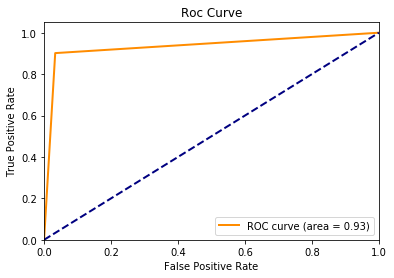

In [128]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = text_clf.decision_function(df.reviews)
fpr, tpr, _ = roc_curve(predicted, df.status)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
    lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Roc Curve")
plt.legend(loc="lower right")
plt.show()

In [129]:
df.groupby(by='SGDClassifier').count()

,status,reviews,sent_tokens,word_tokens,pos_tag,norm_tokens,MultinomialNB,LogisticRegression
SGDClassifier,,,,,,,,
0,451,451,451,451,451,451,451,451
1,2042,2042,2042,2042,2042,2042,2042,2042


In [135]:
import ast
df.pos_tag = df.pos_tag.apply(lambda x: ast.literal_eval(x))
df.head()

,status,reviews,sent_tokens,word_tokens,pos_tag,norm_tokens,SGDClassifier,MultinomialNB,LogisticRegression
0,1,Kimo's never disappoints. We come here once o...,"[""Kimo's never disappoints."", 'We come here on...","['Kimo', 'never', 'disappoints', 'We', 'come',...","[(Kimo, NNP), (never, RB), (disappoints, VBZ),...","[kimo, never, disappoint, come, everi, trip, m...",1,1,1
1,0,I was there the first week of October and Firs...,['I was there the first week of October and Fi...,"['I', 'was', 'there', 'the', 'first', 'week', ...","[(I, PRP), (was, VBD), (there, RB), (the, DT),...","[first, week, octob, first, think, staff, wond...",0,1,0
2,1,"This place was on my ""Must Do Maui"" list and i...","['This place was on my ""Must Do Maui"" list and...","['This', 'place', 'was', 'on', 'my', 'Must', '...","[(This, DT), (place, NN), (was, VBD), (on, IN)...","[place, must, maui, list, disappoint, must, co...",1,1,1
3,0,Monday night dinner here and they quickly sat ...,['Monday night dinner here and they quickly sa...,"['Monday', 'night', 'dinner', 'here', 'and', '...","[(Monday, NNP), (night, NN), (dinner, NN), (he...","[monday, night, dinner, quickli, sat, group, u...",1,1,1
4,1,Nice view and amazing cocktails. They are loca...,"['Nice view and amazing cocktails.', 'They are...","['Nice', 'view', 'and', 'amazing', 'cocktails'...","[(Nice, NNP), (view, NN), (and, CC), (amazing,...","[nice, view, amaz, cocktail, locat, right, lah...",1,1,1


In [136]:
df.to_csv('../../data/processed/yp_kimos-maui-lahaina_rws_sentiment.csv', index=False)
pd.read_csv('../../data/processed/yp_kimos-maui-lahaina_rws_sentiment.csv').head()

,status,reviews,sent_tokens,word_tokens,pos_tag,norm_tokens,SGDClassifier,MultinomialNB,LogisticRegression
0,1,Kimo's never disappoints. We come here once o...,"[""Kimo's never disappoints."", 'We come here on...","['Kimo', 'never', 'disappoints', 'We', 'come',...","[('Kimo', 'NNP'), ('never', 'RB'), ('disappoin...","['kimo', 'never', 'disappoint', 'come', 'everi...",1,1,1
1,0,I was there the first week of October and Firs...,['I was there the first week of October and Fi...,"['I', 'was', 'there', 'the', 'first', 'week', ...","[('I', 'PRP'), ('was', 'VBD'), ('there', 'RB')...","['first', 'week', 'octob', 'first', 'think', '...",0,1,0
2,1,"This place was on my ""Must Do Maui"" list and i...","['This place was on my ""Must Do Maui"" list and...","['This', 'place', 'was', 'on', 'my', 'Must', '...","[('This', 'DT'), ('place', 'NN'), ('was', 'VBD...","['place', 'must', 'maui', 'list', 'disappoint'...",1,1,1
3,0,Monday night dinner here and they quickly sat ...,['Monday night dinner here and they quickly sa...,"['Monday', 'night', 'dinner', 'here', 'and', '...","[('Monday', 'NNP'), ('night', 'NN'), ('dinner'...","['monday', 'night', 'dinner', 'quickli', 'sat'...",1,1,1
4,1,Nice view and amazing cocktails. They are loca...,"['Nice view and amazing cocktails.', 'They are...","['Nice', 'view', 'and', 'amazing', 'cocktails'...","[('Nice', 'NNP'), ('view', 'NN'), ('and', 'CC'...","['nice', 'view', 'amaz', 'cocktail', 'locat', ...",1,1,1
